# **Which technology usage patterns have the strongest impact on mental health?**



## **1. Data Acquisition** 

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [135]:
csv_file = "../data/Wellbeing_and_lifestyle_data_Kaggle.csv"
csv_data = pd.read_csv(csv_file)

# Display the first few rows of the dataframe to understand its structure
csv_data.head()


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## **Data Preparation/Data Cleaning** 


### **Filtering the dataset**

In [136]:
csv_data = pd.read_csv(csv_file)  # Replace with your actual file name

# List of columns to keep
columns_to_keep = [
    "Timestamp",
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "BMI_RANGE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "SUFFICIENT_INCOME",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    "AGE",
    "GENDER",
    "WORK_LIFE_BALANCE_SCORE"
]

# Keep only those columns
filtered_csv_data = csv_data[columns_to_keep]

# Save to new CSV
filtered_csv_data.to_csv("../data/Filtered_Wellbeing_and_lifestyle_data_Kaggle.csv.csv", index=False)
csv_data=filtered_csv_data


### **Missing Values:** 

In [137]:
print("\nMissing values check: \n")
missing_val = csv_data.isnull().sum()
if missing_val.sum()== 0:
    print("no missing values found")
else:
    print("name of the column and the number of values missing:")
    print(missing_val[missing_val>0])


Missing values check: 

no missing values found


### **Different Format:**
 

In [138]:

print("\nData formatting check per column: ")
issue=False
for column in csv_data.columns:
        if csv_data[column].apply(type).nunique()>1:
            print(f"Mixed data types in column '{column}'")
            issue = True
            
if not issue:
        print("no issues with formatting")


Data formatting check per column: 
no issues with formatting


### **Errors: Case sensitive**
**Note:** There are no case sensitive errors in the whole dataset.


#### **Gender**


In [139]:
print(csv_data["GENDER"].unique())

valid_values = ["Male", "Female"]
invalid_entries = csv_data[~csv_data["GENDER"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["GENDER"].head())

print(filtered_csv_data[column].dtypes)

['Female' 'Male']
Case-sensitive invalid entries:
Series([], Name: GENDER, dtype: object)
float64


### **Outliers:**
**Note:** The IQR factor is set as a factor of 1.5


Outliers in 'FRUITS_VEGGIES':
Empty DataFrame
Columns: [FRUITS_VEGGIES]
Index: []

Outliers in 'PLACES_VISITED':
Empty DataFrame
Columns: [PLACES_VISITED]
Index: []

Outliers in 'CORE_CIRCLE':
Empty DataFrame
Columns: [CORE_CIRCLE]
Index: []

Outliers in 'DAILY_STEPS':
Empty DataFrame
Columns: [DAILY_STEPS]
Index: []

Outliers in 'SLEEP_HOURS':
       SLEEP_HOURS
738              2
1904             1
2572             2
2968             1
2986             1
3007             1
3023             1
3376             1
3436             1
3437             1
3611             2
3785             1
4380             2
4763             1
5712             2
5867             1
6299             1
6751             2
6795             2
8394             2
8924             1
8967             1
9318             2
9338             1
9415             2
9637             2
9929             2
9930             2
9944             2
9987             1
10083            2
10975            2
12955            1
13081 

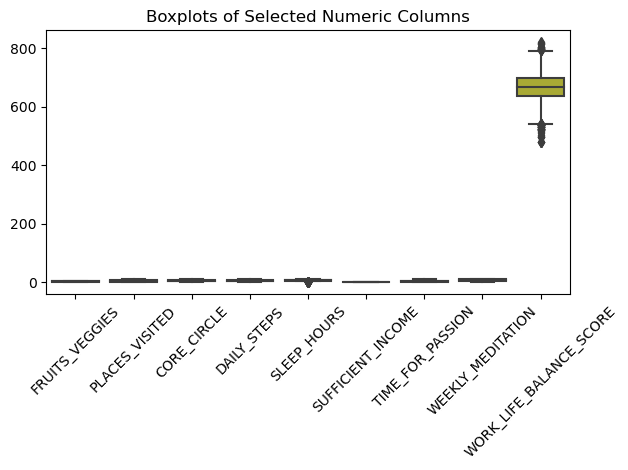

In [140]:

# Columns for outlier detection (only numeric)
columns = [
    "FRUITS_VEGGIES",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "SUFFICIENT_INCOME",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    "WORK_LIFE_BALANCE_SCORE"
]

# Make a copy to clean outliers if needed
clean_data = csv_data.copy()

for col in columns:
    Q1 = csv_data[col].quantile(0.25)
    Q3 = csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = csv_data[(filtered_csv_data[col] < lower_bound) | (csv_data[col] > upper_bound)]

    print(f"\nOutliers in '{col}':")
    print(outliers[[col]])

    # Optionally remove outliers
    # clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]

# Boxplots for visualizing all columns at once
sns.boxplot(data=csv_data[columns])
plt.title("Boxplots of Selected Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Explorative Analysis

### Univariate Analysis

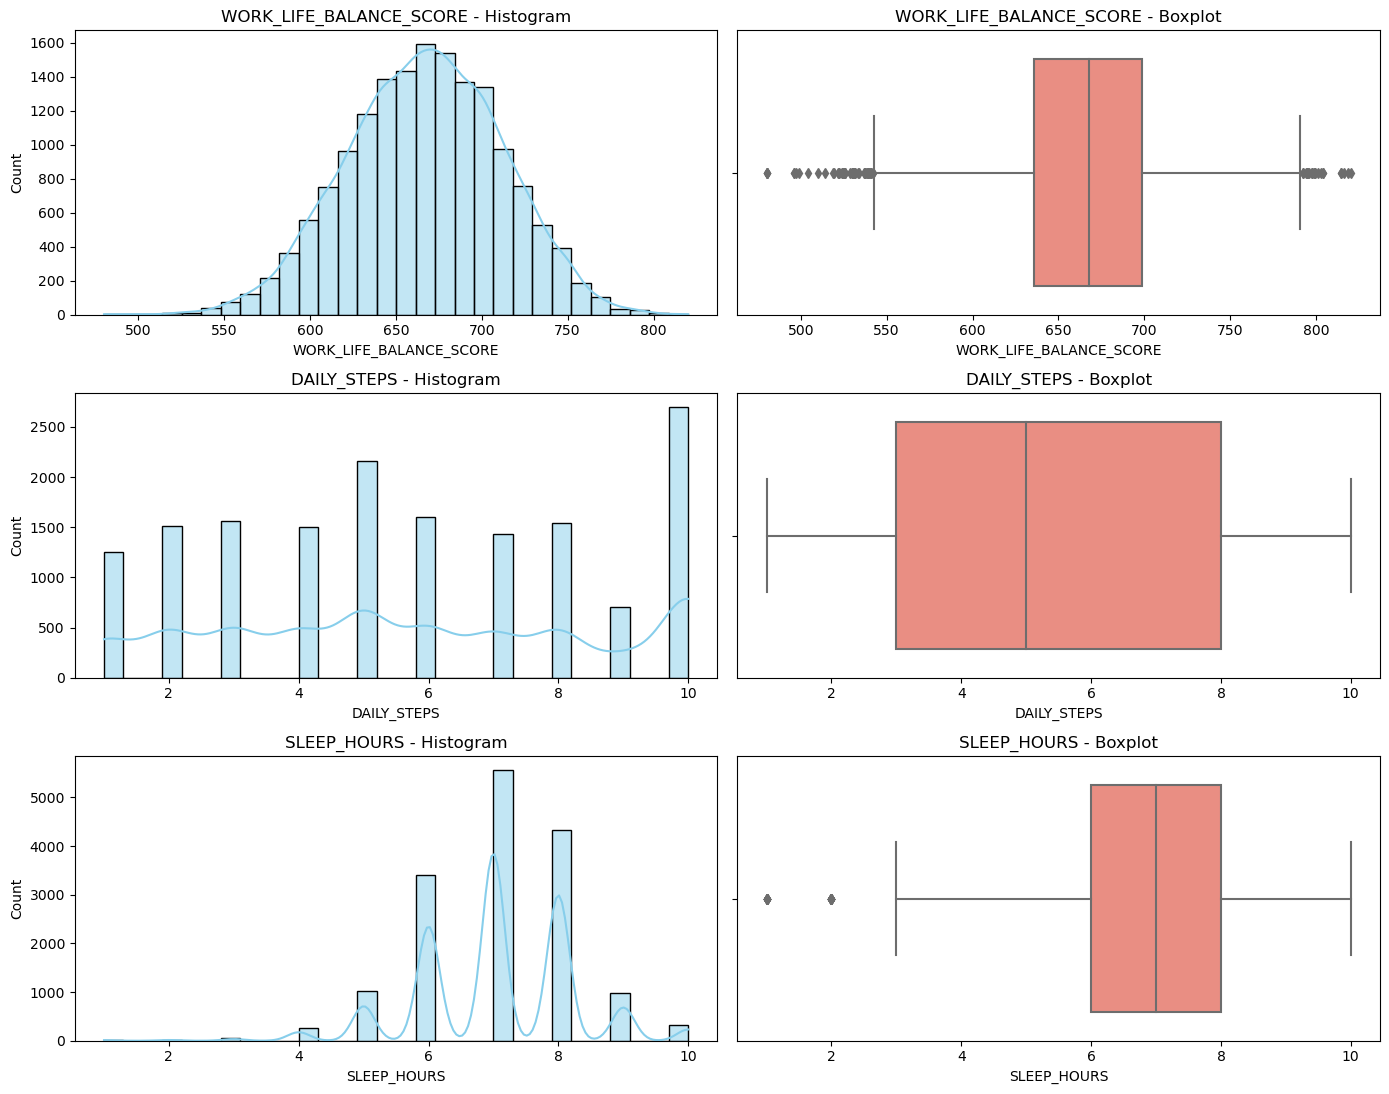

In [141]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# List of features to plot
features = ['WORK_LIFE_BALANCE_SCORE', 'DAILY_STEPS', 'SLEEP_HOURS']

for i, feature in enumerate(features):
    sns.histplot(csv_data[feature], bins=30, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{feature} - Histogram')

    sns.boxplot(x=csv_data[feature], ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'{feature} - Boxplot')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Bivariate Analysis

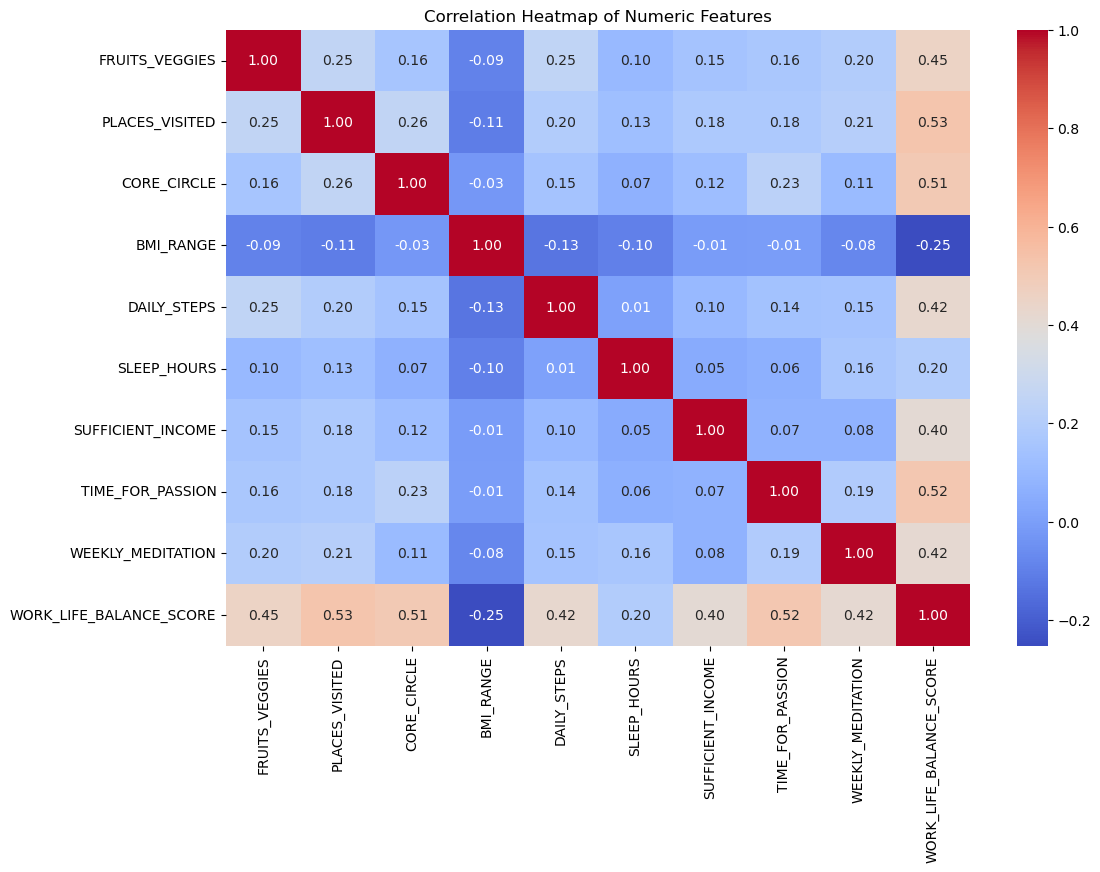

In [142]:
numeric_cols = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'BMI_RANGE',
                'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
                'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']

plt.figure(figsize=(12, 8))
sns.heatmap(csv_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

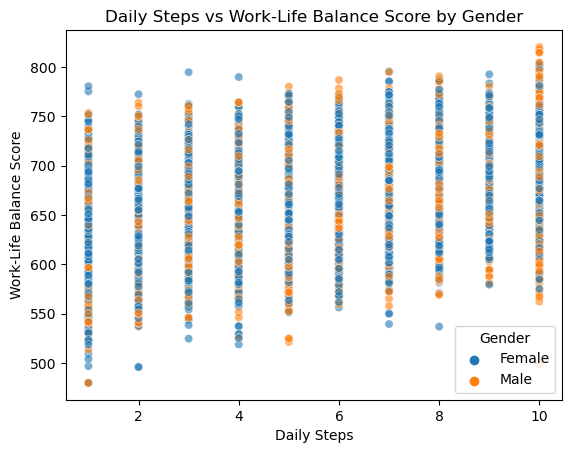

In [143]:
sns.scatterplot(data=csv_data, x='DAILY_STEPS', y='WORK_LIFE_BALANCE_SCORE', hue='GENDER', alpha=0.6)
plt.title('Daily Steps vs Work-Life Balance Score by Gender')
plt.xlabel('Daily Steps')
plt.ylabel('Work-Life Balance Score')
plt.legend(title='Gender')
plt.show()


### Categorical Data Analysis

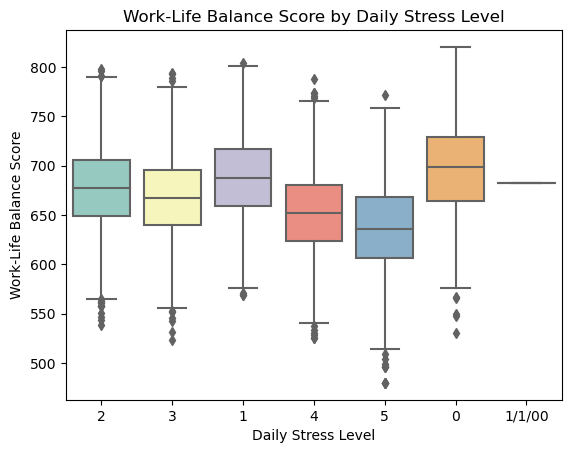

In [144]:
sns.boxplot(data=csv_data, x='DAILY_STRESS', y='WORK_LIFE_BALANCE_SCORE', palette='Set3')
plt.title('Work-Life Balance Score by Daily Stress Level')
plt.xlabel('Daily Stress Level')
plt.ylabel('Work-Life Balance Score')
plt.show()


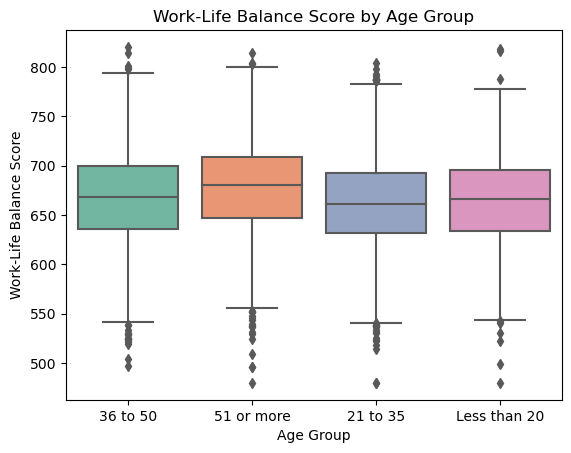

In [145]:
sns.boxplot(data=csv_data, x='AGE', y='WORK_LIFE_BALANCE_SCORE', palette='Set2')
plt.title('Work-Life Balance Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Work-Life Balance Score')
plt.show()



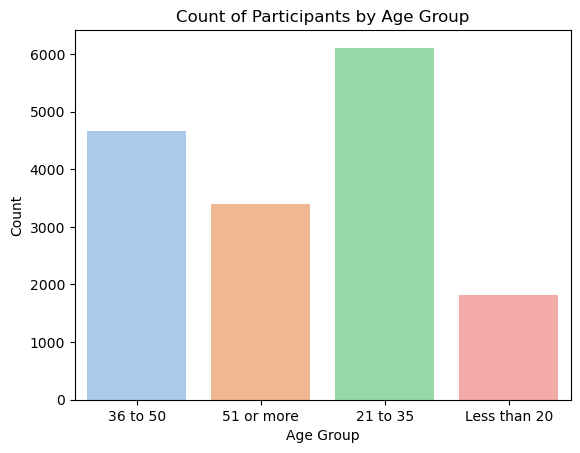

In [146]:
sns.countplot(data=csv_data, x='AGE', palette='pastel')
plt.title('Count of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


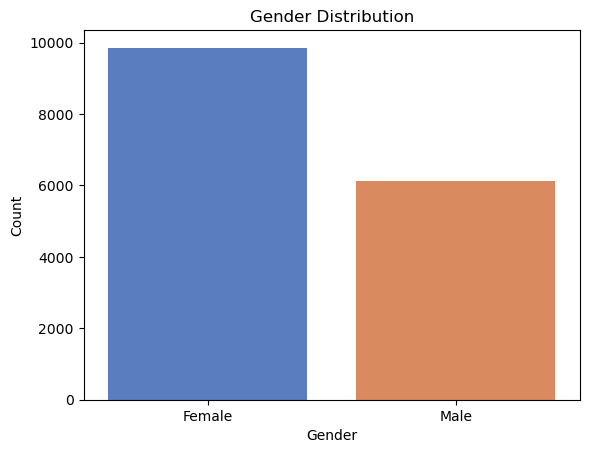

In [147]:

sns.countplot(data=csv_data, x='GENDER', palette='muted')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
